(Source: http://www.scipy-lectures.org/packages/scikit-learn/index.html#supervised-learning-classification-of-handwritten-digits)

In [1]:
%matplotlib notebook

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

## Look at the data

<IPython.core.display.Javascript object>


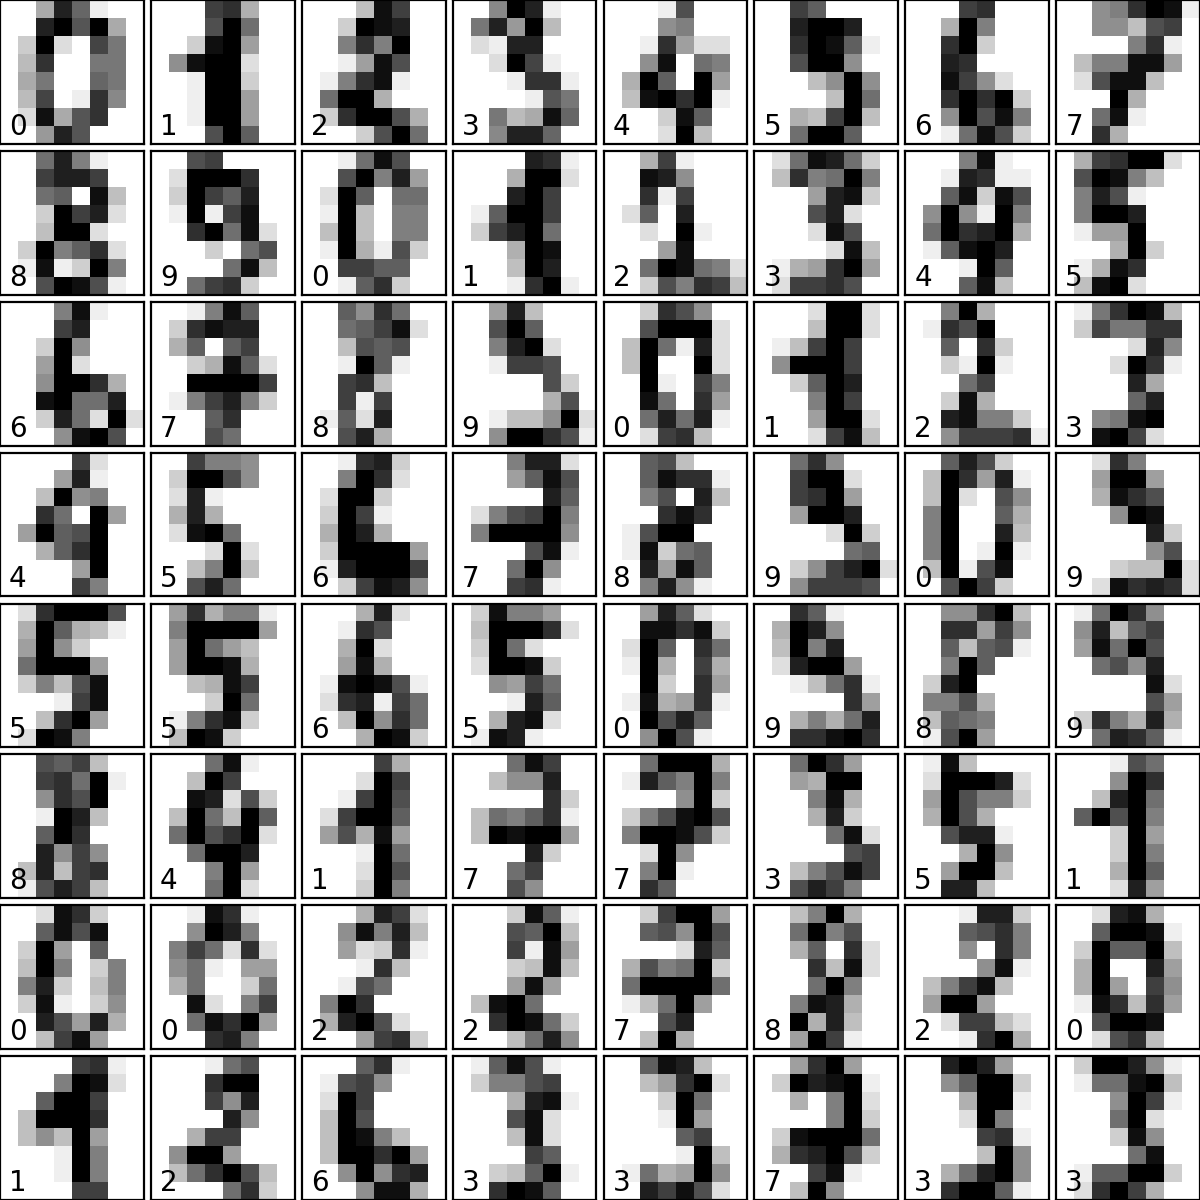

In [3]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

## Let's look at the first 2 dimensions

<IPython.core.display.Javascript object>


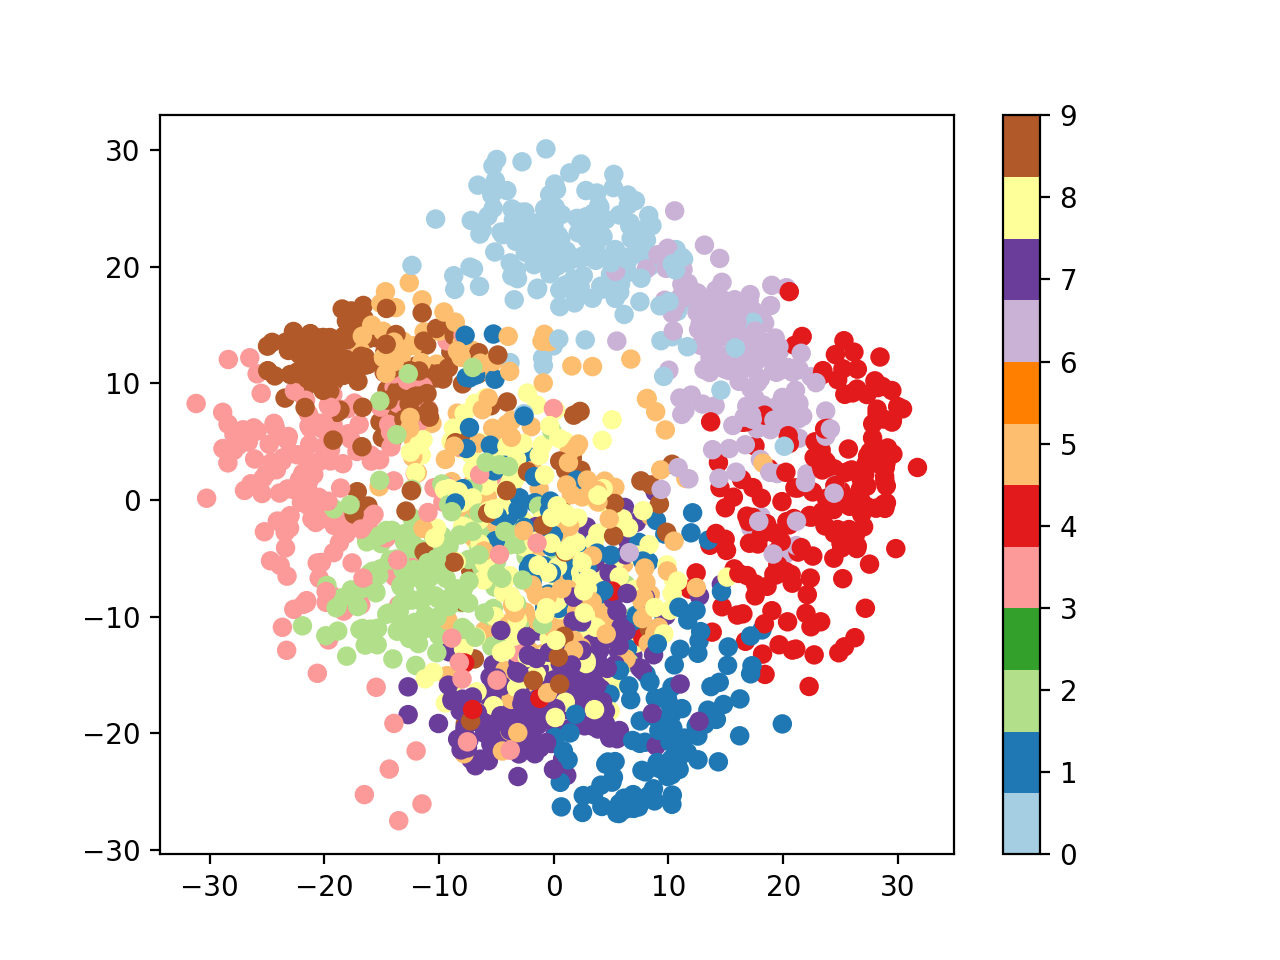

In [4]:
plt.figure()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()
plt.show()

## Let's try Naive Bayes Classification...

> Abstractly, naive Bayes is a conditional probability model: given a problem instance to be classified, represented by a vector $ \mathbf {x} =(x_{1},\dots ,x_{n}) $ representing some $n$ features (independent variables), it assigns to this instance probabilities, $ p(C_{k}\mid x_{1},\dots ,x_{n})\ $, for each of $K$ possible outcomes or classes $C_{k}$.

(https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

<IPython.core.display.Javascript object>


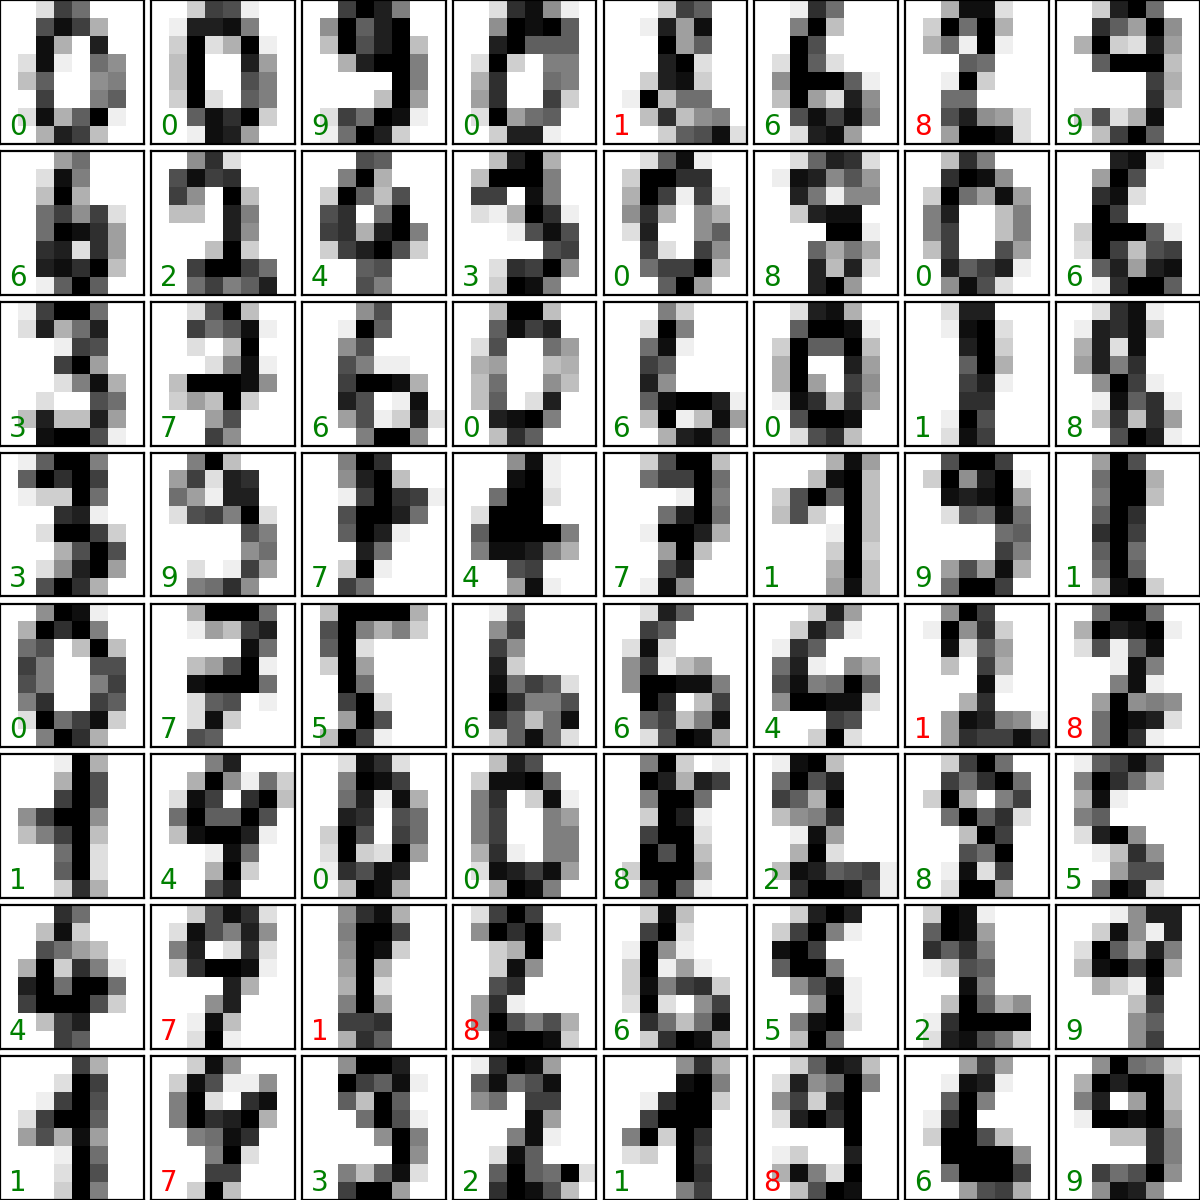

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')
        
plt.show()

In [7]:
matches = (predicted == expected)
print(matches.sum())

365


In [8]:
print(len(matches))

450


In [9]:
matches.sum() / float(len(matches))

0.8111111111111111

In [10]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.57      0.93      0.70        40
           2       1.00      0.46      0.63        41
           3       0.93      0.75      0.83        52
           4       0.90      0.74      0.81        47
           5       1.00      0.93      0.96        43
           6       1.00      0.94      0.97        50
           7       0.75      0.96      0.84        45
           8       0.43      0.77      0.55        35
           9       1.00      0.67      0.80        55

   micro avg       0.81      0.81      0.81       450
   macro avg       0.86      0.81      0.81       450
weighted avg       0.87      0.81      0.82       450



In [11]:
print(metrics.confusion_matrix(expected, predicted))
plt.show()

[[41  1  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  3  0]
 [ 0  7 19  0  0  0  0  0 15  0]
 [ 0  1  0 39  0  0  0  1 11  0]
 [ 0  3  0  0 35  0  0  8  1  0]
 [ 0  2  0  1  0 40  0  0  0  0]
 [ 0  2  0  0  1  0 47  0  0  0]
 [ 0  0  0  0  2  0  0 43  0  0]
 [ 0  7  0  1  0  0  0  0 27  0]
 [ 0  5  0  1  1  0  0  5  6 37]]
